# Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plot

In [2]:
data = pd.read_csv('playstore-analysis.csv')

In [3]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.000000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
pd.isnull(data).sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

1 Data clean up – Missing value treatment

1a Drop records where rating is missing since rating is our target/study variable

In [5]:
data.dropna(subset=['Rating'], axis=0, inplace=True)

In [6]:
pd.isnull(data).sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

1b Check the null values for the Android Ver column
 
    i. Are all 3 records having the same problem? 
    ii. Drop the 3rd record i.e. record for “Life Made WIFI …” 
    iii. Replace remaining missing values with the mode

In [7]:
bool_series = pd.isnull(data['Android Ver'])

data[bool_series]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
data.drop(index = 10472, inplace=True)

In [9]:
pd.isnull(data).sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [10]:
data['Android Ver'] = data['Android Ver'].fillna(data['Android Ver'].mode()[0])

In [11]:
pd.isnull(data).sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

1c Current ver – replace with most common value

In [12]:
data['Current Ver'] = data['Current Ver'].fillna(data['Current Ver'].mode()[0])

pd.isnull(data).sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

2. Data clean up – correcting the data types 

 a. Which all variables need to be brought to numeric types? 
 b. Price variable – remove $ sign and convert to ﬂoat
 c. Installs – remove ‘,’ and ‘+’ sign, convert to integer 
 d. Convert all other identiﬁed columns to numeric


In [13]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
data['Price'] = data.Price.apply(lambda x: x.strip('$'))

In [15]:
data['Price'] = data.Price.astype(float)

In [16]:
data['Installs'] = data.Installs.apply(lambda y: y.replace(',', ''))
data['Installs'] = data.Installs.apply(lambda z: z.strip('+'))

In [17]:
data['Installs'] = data.Installs.astype(int)
data['Reviews'] = data.Reviews.astype(float)
data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

i. Are there any such records? Drop if so.


In [19]:
data['Rating'].mean()

4.191757420456978

3 b. Reviews should not be more than installs as only those who installed can review the app.

     i. Are there any such records? Drop if so. 

In [20]:
list_reviews = data[data['Reviews'] > data['Installs']]

In [21]:
list(list_reviews.index)

[2454, 4663, 5917, 6700, 7402, 8591, 10697]

In [22]:
data.drop(index = list(list_reviews.index), inplace=True)

In [23]:
data[data['Reviews'] > data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


4. Identify and handle outliers –

a. Price column

i. Make suitable plot to identify outliers in price

ii. Do you expect apps on the play store to cost $200? Check out these cases

iii. After dropping the useless records, make the suitable plot again to identify outliers

iv. Limit data to records with price < $30

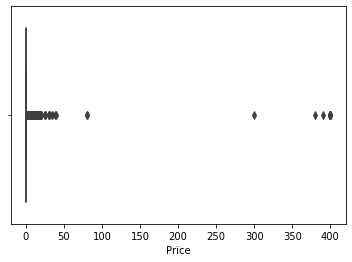

In [25]:
import seaborn as sb
sb.boxplot(x= 'Price', data=data)

There are outliers in price of dataset

In [28]:
list_price = data[data['Price'] > 30]

In [29]:
list(list_price.index)

[2253,
 2301,
 2365,
 2402,
 2414,
 4197,
 4362,
 4367,
 5351,
 5354,
 5355,
 5356,
 5357,
 5358,
 5359,
 5360,
 5362,
 5364,
 5366,
 5369,
 5373]

In [30]:
data.drop(index = list(list_price.index), inplace=True)

In [31]:
data[data['Price'] > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


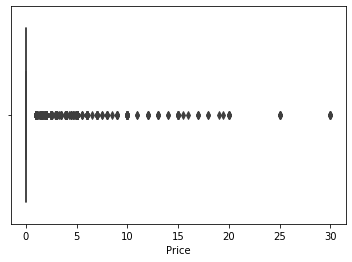

In [32]:
import seaborn as sb
sb.boxplot(x= 'Price', data=data)

plot after dropping outliers

4 b. Reviews column

i. Make suitable plot

ii. Limit data to apps with < 1 Million reviews

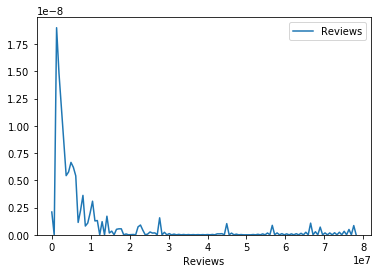

In [33]:
import seaborn as sb
sb.distplot(data['Reviews'], label='Reviews', hist=False, kde=True)

In [34]:
list_Reviews = data[data['Reviews'] >= 1000000]

In [35]:
list(list_Reviews.index)

[139,
 152,
 189,
 194,
 201,
 293,
 297,
 335,
 336,
 338,
 339,
 340,
 341,
 342,
 344,
 345,
 347,
 351,
 356,
 363,
 365,
 366,
 370,
 371,
 378,
 381,
 382,
 383,
 385,
 386,
 390,
 391,
 392,
 393,
 395,
 403,
 406,
 407,
 411,
 412,
 413,
 415,
 417,
 418,
 419,
 420,
 424,
 431,
 449,
 451,
 452,
 464,
 465,
 467,
 468,
 469,
 474,
 475,
 699,
 737,
 784,
 793,
 799,
 806,
 826,
 832,
 855,
 865,
 866,
 874,
 889,
 893,
 904,
 931,
 958,
 1088,
 1173,
 1199,
 1242,
 1286,
 1360,
 1362,
 1386,
 1404,
 1421,
 1653,
 1654,
 1655,
 1659,
 1660,
 1661,
 1662,
 1663,
 1665,
 1666,
 1667,
 1668,
 1670,
 1671,
 1675,
 1677,
 1679,
 1680,
 1681,
 1683,
 1685,
 1688,
 1689,
 1690,
 1694,
 1695,
 1697,
 1698,
 1699,
 1700,
 1701,
 1702,
 1703,
 1704,
 1705,
 1706,
 1707,
 1708,
 1709,
 1710,
 1712,
 1716,
 1717,
 1718,
 1720,
 1721,
 1722,
 1723,
 1724,
 1726,
 1729,
 1730,
 1733,
 1735,
 1736,
 1737,
 1738,
 1739,
 1740,
 1742,
 1743,
 1744,
 1748,
 1749,
 1750,
 1751,
 1752,
 1754,
 175

In [36]:
data.drop(index = list(list_Reviews.index), inplace=True)

In [37]:
data[data['Reviews'] >= 1000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


4 c. Installs

i. What is the 95th percentile of the installs?

ii. Drop records having a value more than the 95th percentile

In [38]:
data['Installs'].quantile(.95)

10000000.0

In [39]:
list_Installs = data[data['Installs'] > data['Installs'].quantile(.95)]

In [40]:
list(list_Installs.index)

[3,
 143,
 188,
 192,
 225,
 292,
 346,
 348,
 369,
 389,
 396,
 459,
 466,
 859,
 879,
 886,
 888,
 892,
 903,
 930,
 1076,
 1083,
 1096,
 1156,
 1163,
 1584,
 1658,
 1673,
 1676,
 1746,
 1753,
 1761,
 1767,
 1778,
 1899,
 1938,
 1957,
 2000,
 2010,
 2012,
 2014,
 2026,
 2104,
 2208,
 2636,
 2663,
 2664,
 2666,
 2763,
 2809,
 2814,
 2825,
 2829,
 2836,
 2858,
 2861,
 2870,
 2902,
 2910,
 2914,
 2916,
 2936,
 2941,
 2948,
 2963,
 3011,
 3074,
 3084,
 3103,
 3118,
 3125,
 3151,
 3202,
 3237,
 3238,
 3242,
 3243,
 3244,
 3246,
 3247,
 3261,
 3266,
 3287,
 3291,
 3294,
 3315,
 3400,
 3428,
 3464,
 3465,
 3467,
 3476,
 3477,
 3484,
 3486,
 3489,
 3490,
 3491,
 3492,
 3495,
 3507,
 3516,
 3526,
 3528,
 3530,
 3532,
 3533,
 3534,
 3545,
 3550,
 3562,
 3574,
 3670,
 3672,
 3677,
 3687,
 3690,
 3691,
 3693,
 3729,
 3736,
 3765,
 3816,
 3872,
 3901,
 3902,
 3911,
 3913,
 3916,
 3922,
 3952,
 3974,
 3980,
 4042,
 4080,
 4083,
 4107,
 4123,
 4151,
 4159,
 4224,
 4252,
 4255,
 4322,
 4323,
 4325,


In [41]:
data.drop(index =list(list_Installs.index), inplace=True)

In [42]:
data[data['Installs'] > data['Installs'].quantile(.95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Data analysis to answer business questions

5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

a. How do you explain this?

b. What is the implication of this on your analysis?

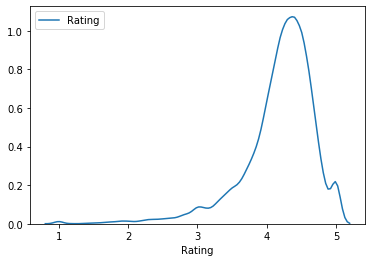

In [43]:
import seaborn as sb
sb.distplot(data['Rating'], label='Rating', hist=False, kde=True)

Ratings are more skewed towards lower values

Most o the rating lie between 3.5 to 5

there are outliers in rating skewed towards left

In [44]:
data['Rating'].mean()
#Mean of rating is 4.17, representing good ratings

4.170800237107298

6. What are the top Content Rating values?

a. Are there any values with very few records?

b. If yes, drop those as they won’t help in the analysis

In [45]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [46]:
list_content_1 = data[(data['Content Rating'] == 'Adults only 18+')]
list(list_content_1.index)
data.drop(index =list(list_content_1.index), inplace=True)

In [47]:
list_content_1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005.0,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017.0,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326.0,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device


In [48]:
list_content_2 = data[(data['Content Rating'] == 'Unrated')]
list(list_content_2.index)
data.drop(index =list(list_content_2.index), inplace=True)

In [49]:
list_content_2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8266,DC Universe Online Map,TOOLS,4.1,1186.0,6400.0,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

b. Do you see any patterns?

c. How do you explain the pattern?

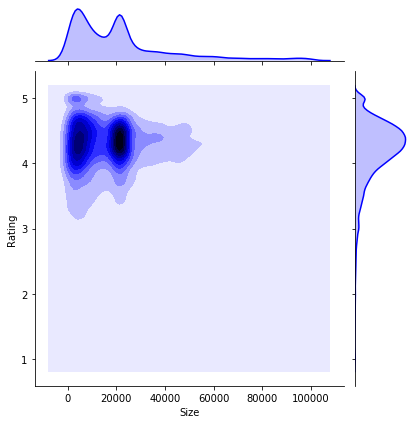

In [50]:
import seaborn as sb
sb.jointplot(x="Size", y="Rating", data=data, kind='kde', color='b')

most of the apps with highest ratings have size within 40000

most of apps have size in the region 0 to 20000

most apps have rating around 4 - 4.5

there are outliers in size towards higher values, size are skewed towards right

8. Effect of price on rating

a. Make a jointplot (with regression line)

b. What pattern do you see?

c. How do you explain the pattern?

d. Replot the data, this time with only records with price > 0

e. Does the pattern change?

f. What is your overall inference on the effect of price on the rating 

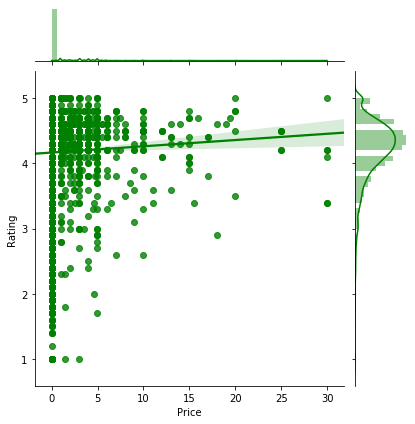

In [51]:
import seaborn as sb
sb.jointplot(x="Price", y="Rating", data=data, kind='reg', color='g')

most of the apps have 0 price

there are outliers in price towards higher values, price are skewed towards right

Regression line is near mean value of rating

Regression line has increasing trend

In [52]:
price_data = data[data['Price'] >0]

plot for records with price > 0

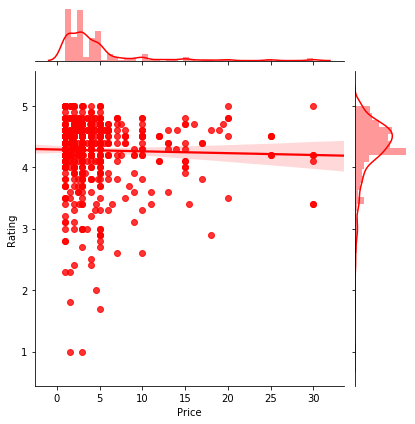

In [532]:
import seaborn as sb
sb.jointplot(x="Price", y="Rating", data=price_data, kind='reg', color='r')

There is change in pattern of plot

most of the apps have price between 1 and 5

Regression line has decreasing trend

9. Look at all the numeric interactions together –

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

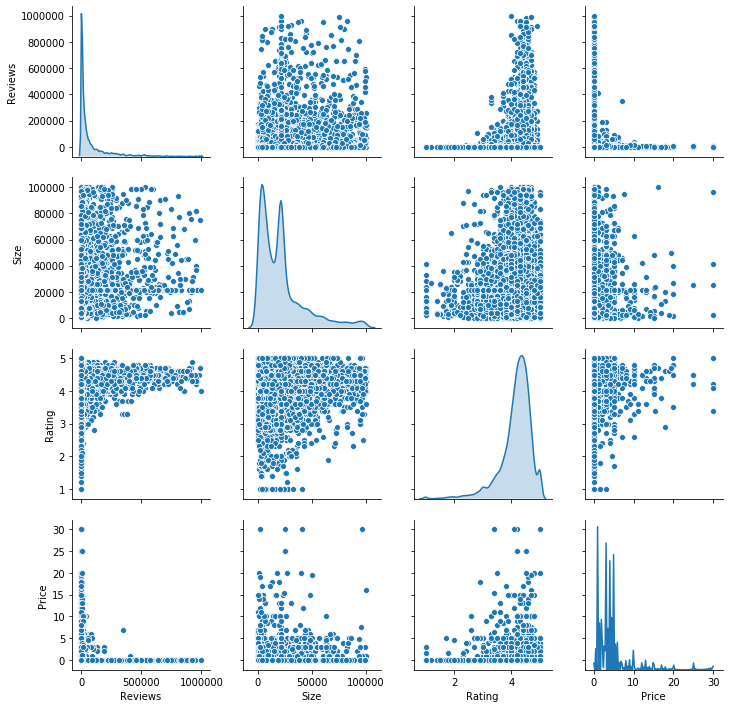

In [533]:
import seaborn as sb
sb.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='scatter', diag_kind="kde")

10.Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

b. Which metric would you use? Mean? Median? Some other quantile?

c. Choose the right metric and plot

Text(0.5, 1.0, 'Content Rating vs Mean rating')

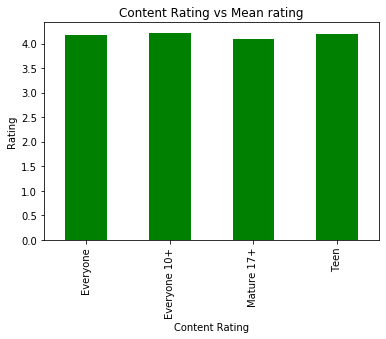

In [534]:
data.groupby(['Content Rating']).mean()['Rating'].plot(kind='bar', color='g')
plot.ylabel('Rating')
plot.title('Content Rating vs Mean rating')


# prefer the mean metric

Text(0.5, 1.0, 'Content Rating vs Median rating')

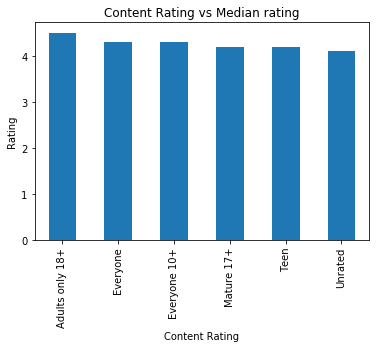

In [424]:
data.groupby(['Content Rating']).median()['Rating'].plot(kind='bar')
plot.ylabel('Rating')
plot.title('Content Rating vs Median rating')

11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

c. Make a heatmap of this
   i. Annotated
   ii. Greens color map

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

In [539]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


In [542]:
import numpy as np 
data_1=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
data_1

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


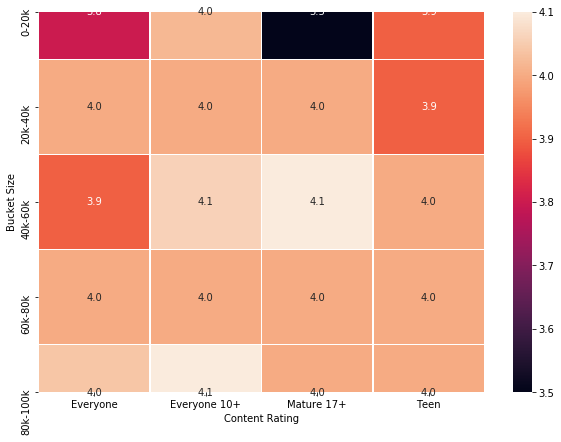

In [546]:
import matplotlib.pyplot as plot
f,ax = plot.subplots(figsize=(10, 7))
import seaborn as sb
sb.heatmap(data_1, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plot.show()

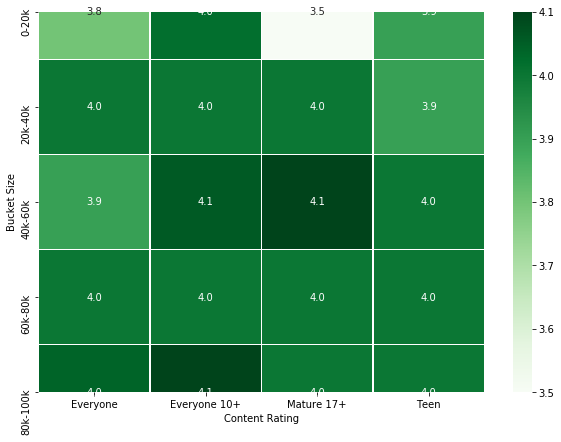

In [547]:
import matplotlib.pyplot as plot
f,ax = plot.subplots(figsize=(10, 7))
import seaborn as sb
sb.heatmap(data_1, annot=True, linewidths=.5, cmap='Greens', fmt='.1f',ax=ax)
plot.show()

Based on analysis
its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the 
highest rating in all cateegories. So, we can conclude that heavier apps are preferred in all categories.

In [548]:
data.to_csv("cleaned_data.csv", index=False)